# WISCONSIN BREAST CANCER

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections
main_dataframe = pd.read_csv("breast-cancer-wisconsin.data",header=None)
main_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Preprocessing

In [ ]:
#renaming coloumns and dropping id coloumn as it is of no significance 
main_dataframe.columns = ["id","clumpthickness", "uniformityofcellsize","uniformityofcellshape","marginaladhesion","singleepithelialcellsize","barenuclei","blandchromatin","normalnucleoli","mitoses","classification"]
main_dataframe = main_dataframe.drop(["id"],axis=1)
main_dataframe

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,classification
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
for i in main_dataframe.columns:
  print(i,main_dataframe[i].unique())

clumpthickness [ 5  3  6  4  8  1  2  7 10  9]
uniformityofcellsize [ 1  4  8 10  2  3  7  5  6  9]
uniformityofcellshape [ 1  4  8 10  2  3  5  6  7  9]
marginaladhesion [ 1  5  3  8 10  4  6  2  9  7]
singleepithelialcellsize [ 2  7  3  1  6  4  5  8 10  9]
barenuclei ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
blandchromatin [ 3  9  1  2  4  5  7  8  6 10]
normalnucleoli [ 1  2  7  4  5  3 10  6  9  8]
mitoses [ 1  5  4  2  3  7 10  8  6]
classification [2 4]


### replacing all the missing values with the mean of the coloumn. as there are only 16 missing values, removing the coloumn would have been too much, and replacing the issing values with mean gave better accuracy compared to dropping the rows.

In [ ]:
main_dataframe['barenuclei']=main_dataframe['barenuclei'].replace(to_replace = ['?'], value =['3'])

In [ ]:
main_dataframe['barenuclei'].value_counts()

1     402
10    132
3      44
2      30
5      30
8      21
4      19
9       9
7       8
6       4
Name: barenuclei, dtype: int64

In [ ]:
main_dataframe['barenuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [ ]:
main_dataframe.shape

(699, 10)

In [ ]:
for i in main_dataframe['barenuclei'].unique():
   main_dataframe['barenuclei']=main_dataframe['barenuclei'].replace(to_replace = [i], value =[int(i)])

In [ ]:
main_dataframe.describe()

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,classification
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e45ab52e0>,
      dtype=object)

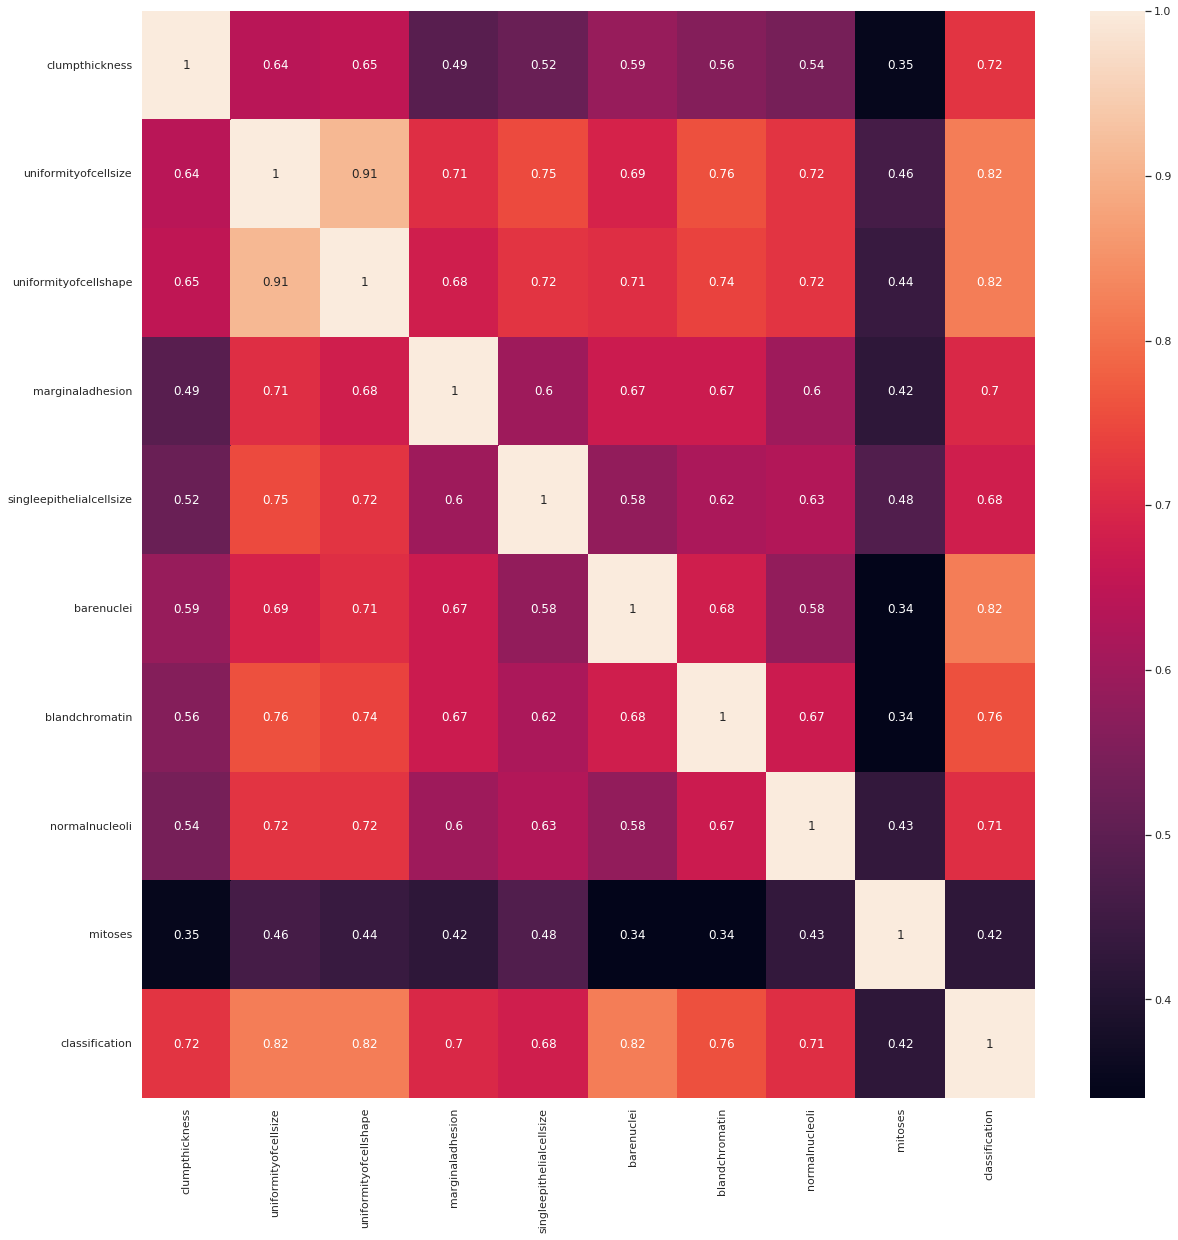

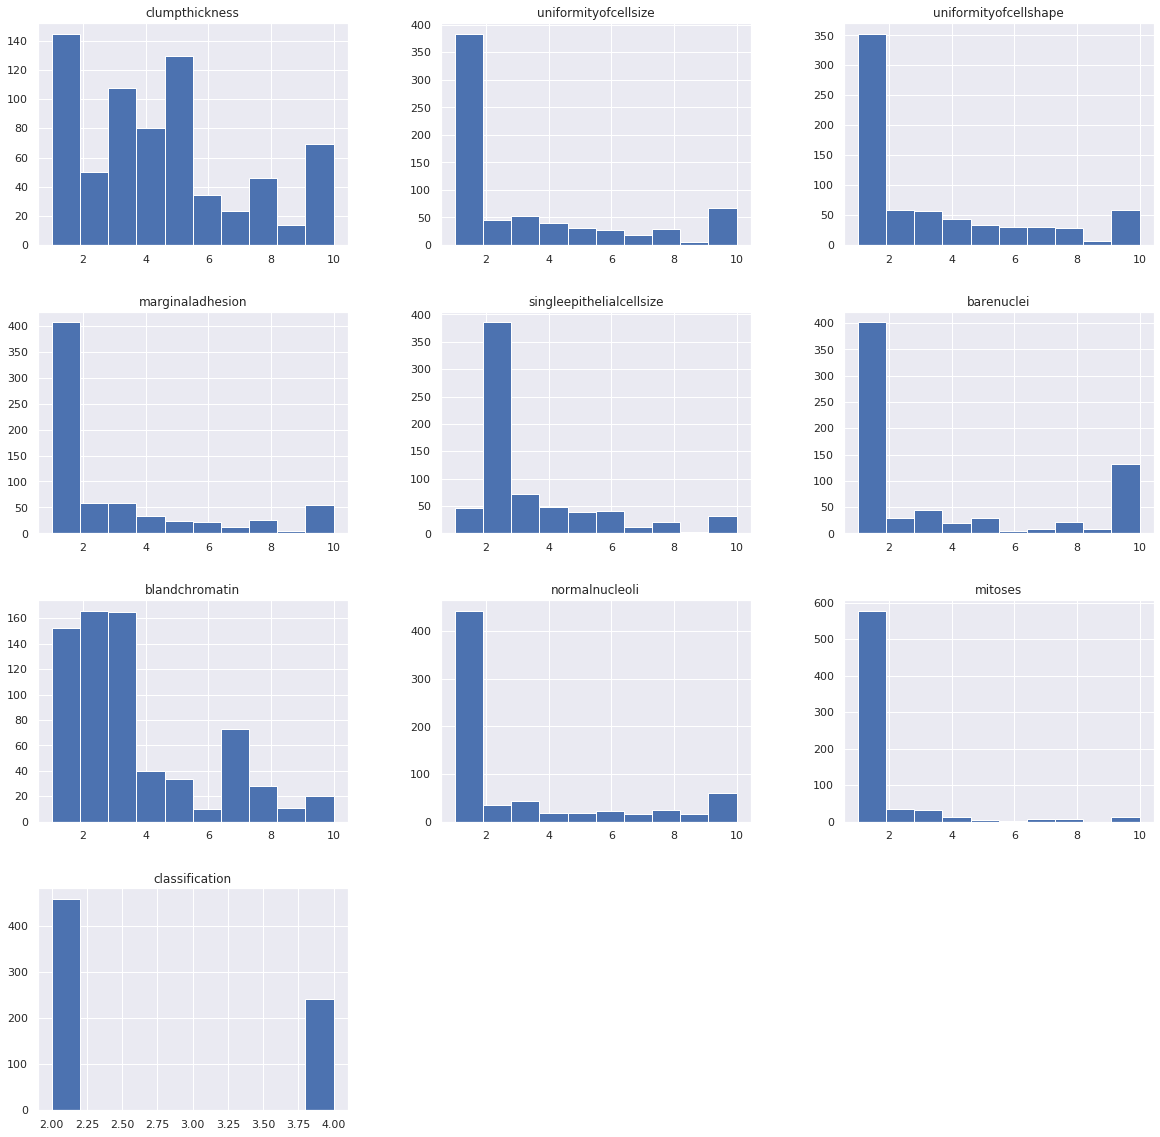

In [ ]:
# Data Exploration
sns.set(rc={'figure.figsize':(20,20)})
correlation_matrix = main_dataframe.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
main_dataframe.hist()


### we observe that except mitosis all other features have a pretty high co-relation with our target variable

## splitting data and converting target coloumn to binary


In [ ]:
learning_data_frame = main_dataframe.sample(frac=0.8, random_state=200)
testing_data_frame = main_dataframe.drop(learning_data_frame.index)

# seperating features and target

X_learn = learning_data_frame.iloc[:,0:9] #features
Y_learn = learning_data_frame.iloc[:,9:10] # target

X_test = testing_data_frame.iloc[:,0:9] #features
Y_test = testing_data_frame.iloc[:,9:10] # target

# convert target variable to 0,1.
# 1 denotes malignant, 0 denotes benign.

Y_learn = Y_learn.replace(to_replace=[2,4], value = [0,1])
Y_test = Y_test.replace(to_replace=[2,4],value=[0,1])

# Logistic Regression

In [ ]:
X_learn.shape,Y_learn.shape 

((559, 9), (559, 1))

In [ ]:
X_test.shape,Y_test.shape 

((140, 9), (140, 1))

In [ ]:
X_learn=X_learn.to_numpy()
Y_learn=Y_learn.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

## defining Sigmoid Function   

In [ ]:
#Defining a sigmoid function
def sigmoid(z):
    op = 1/(1 + np.exp(-z)) 
    return op


## Defining the cost function

In [ ]:

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()




## defining gradient descent

In [ ]:
 
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

## Logistic Regression Implementation

In [ ]:
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(sigma,self.y)
 
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        temp=np.ones((x_new.shape[0], 1))
        x_new = np.concatenate((temp, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

In [ ]:
#Preparing the data
x = X_learn
y = np.reshape(Y_learn, (np.product(Y_learn.shape),))
x_test = X_test
y_test = np.reshape(Y_test, (np.product(Y_test.shape),))
 
print(x.shape,y.shape)
print(x_test.shape,y_test.shape)

(559, 9) (559,)
(140, 9) (140,)


## Training the model

In [ ]:
#creating the class Object
regressor = LogisticRegression(x,y)
 
#
regressor.fit(0.1 , 5000)

y_pred = regressor.predict(x,0.5)
print('Train accuracy -> {}'.format(sum(y_pred == y)*100 / y.shape[0]))

fitted successfully to data
Train accuracy -> 96.4221824686941


## Validating the model

In [ ]:
print(x_test.shape,y_test.shape)

(140, 9) (140,)


In [ ]:
y_pred_test = regressor.predict(x_test,0.5)
print('Test accuracy -> {}'.format(sum(y_pred_test == y_test)*100 / y_test.shape[0]))

Test accuracy -> 97.85714285714286


# Bayes classifier using gaussian distribution 

In [ ]:
main_dataframe

,clumpthickness,uniformityofcellsize,uniformityofcellshape,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,classification
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## boiler plate code

In [ ]:
for i in main_dataframe.columns:
  print(i,main_dataframe[i].unique())

clumpthickness [ 5  3  6  4  8  1  2  7 10  9]
uniformityofcellsize [ 1  4  8 10  2  3  7  5  6  9]
uniformityofcellshape [ 1  4  8 10  2  3  5  6  7  9]
marginaladhesion [ 1  5  3  8 10  4  6  2  9  7]
singleepithelialcellsize [ 2  7  3  1  6  4  5  8 10  9]
barenuclei [ 1 10  2  4  3  9  7  5  8  6]
blandchromatin [ 3  9  1  2  4  5  7  8  6 10]
normalnucleoli [ 1  2  7  4  5  3 10  6  9  8]
mitoses [ 1  5  4  2  3  7 10  8  6]
classification [2 4]


In [ ]:
learning_data_frame = main_dataframe.sample(frac=0.8, random_state=200)
testing_data_frame = main_dataframe.drop(learning_data_frame.index)

# seperating features and target

X_learn = learning_data_frame.iloc[:,0:9] #features
Y_learn = learning_data_frame.iloc[:,9:10] # target

X_test = testing_data_frame.iloc[:,0:9] #features
Y_test = testing_data_frame.iloc[:,9:10] # target

# convert target variable to 0,1.
# 1 denotes malignant, 0 denotes benign.

Y_learn = Y_learn.replace(to_replace=[2,4], value = [0,1])
Y_test = Y_test.replace(to_replace=[2,4],value=[0,1])

In [ ]:
X_learn=X_learn.to_numpy()
Y_learn=Y_learn.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()
x = X_learn
y = np.reshape(Y_learn, (np.product(Y_learn.shape),))
x_test = X_test
y_test = np.reshape(Y_test, (np.product(Y_test.shape),))

## Gaussian Bayes classifier

In [ ]:
# classifier implimentation
class gaussClf:
    def separate_by_classes(self, X, y):
        ''' This function separates our dataset in subdatasets by classes '''
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets

## Training the model

    def fit(self, X, y):
        ''' The fitting function '''
        separated_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            # Here we calculate the mean and the standart deviation from datasets
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]


    def calculate_probability(self, x, mean, stdev):
        ''' This function calculates the class probability using gaussian distribution '''
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def predict_proba(self, X):
        ''' This function predicts the probability for every class '''
        self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(len(self.means)):
                self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
        return self.class_prob

    def predict(self, X):
        ''' This funtion predicts the class of a sample '''
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

## fitting the gaussian

In [ ]:
clf=gaussClf()
clf.fit(X_learn,Y_learn)

{0: 366, 1: 193}


## validating the model

In [ ]:
y_pred=clf.predict(x)
print('Train accuracy -> {}'.format(sum(y_pred == y)*100 / y.shape[0]))

Train accuracy -> 94.99105545617174


In [ ]:
y_pred_test=clf.predict(X_test)
print('Test accuracy -> {}'.format(sum(y_pred_test == y_test)*100 / y_test.shape[0]))

Test accuracy -> 94.28571428571429
